In [1]:
import tpot

# tools
import pandas as pd
import numpy as np

# graph
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_percentage_error

c:\Users\PV\AppData\Local\Programs\Python\Python311\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
#initial information
path = "C:\\Users\\PV\\OneDrive\\Documents\\ehhhh\\Machine Learning\\data_poll\\"
rd_seed = 173808
df = pd.read_csv(path + "copy_of_ys1a_with_phase.csv", quoting=3, index_col=False)
df.head()

,vec,deltachi,delta,deltahmix,deltasmix,phase,ys
0,9.000000,0.032998,0.327647,-1.333333,9.134371,FCC,204.0
1,9.000000,0.032998,0.327647,-1.333333,9.134371,FCC,209.0
2,9.000000,0.032998,0.327647,-1.333333,9.134371,FCC,211.0
3,8.615385,0.032490,2.025282,-11.834320,10.686521,FCC,196.0
4,8.285714,0.031944,2.657710,-19.428571,11.239357,FCC+Im,476.0


In [3]:
df.dtypes

vec          float64
deltachi     float64
delta        float64
deltahmix    float64
deltasmix    float64
phase         object
ys           float64
dtype: object

In [4]:
target_col = 'ys'
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

# change phase into numeric type
pd.options.mode.chained_assignment = None
X['phase'] = LabelEncoder().fit_transform(X['phase'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rd_seed)

print(type(X_train))
print(type(y_train))

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [9]:
rgs = tpot.TPOTRegressor(
    population_size=100,
    generations=30,
    scoring='neg_mean_squared_error',
    cv=10,
    n_jobs=-1,
    warm_start=True,
    random_state=rd_seed,
    periodic_checkpoint_folder='C:\\Users\\PV\\OneDrive\\Documents\\ehhhh\Machine Learning\\tpot\\training process phase',
    verbosity=2
)

rgs.fit(X_train, y_train)
 

Optimization Progress:   0%|          | 0/3100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -78172.9576756722

Generation 2 - Current best internal CV score: -78172.9576756722

Generation 3 - Current best internal CV score: -78172.9576756722

Generation 4 - Current best internal CV score: -78172.9576756722

Generation 5 - Current best internal CV score: -76252.31711784641

Generation 6 - Current best internal CV score: -73004.32921946529

Generation 7 - Current best internal CV score: -73004.32921946529

Generation 8 - Current best internal CV score: -73004.32921946529

Generation 9 - Current best internal CV score: -73004.32921946529

Generation 10 - Current best internal CV score: -72999.24457934932

Generation 11 - Current best internal CV score: -72999.24457934932

Generation 12 - Current best internal CV score: -72999.24457934932

Generation 13 - Current best internal CV score: -72999.24457934932

Generation 14 - Current best internal CV score: -72999.24457934932

Generation 15 - Current best internal CV score: -70610.46096

TPOTRegressor(cv=10, generations=30, n_jobs=-1,
              periodic_checkpoint_folder='C:\\Users\\PV\\OneDrive\\Documents\\ehhhh\\Machine '
                                         'Learning\\tpot\\training process '
                                         'phase',
              random_state=173808, scoring='neg_mean_squared_error',
              verbosity=2, warm_start=True)

In [6]:
y_pred = rgs.predict(X_test)

pd.DataFrame(y_pred, columns=['prediction'])

y_pred_df = pd.DataFrame(y_pred, columns=['predicted'])
y_true_df = pd.DataFrame(y_test, columns=['true'])

data_as_df = pd.concat([y_true_df, y_pred_df], axis=1)

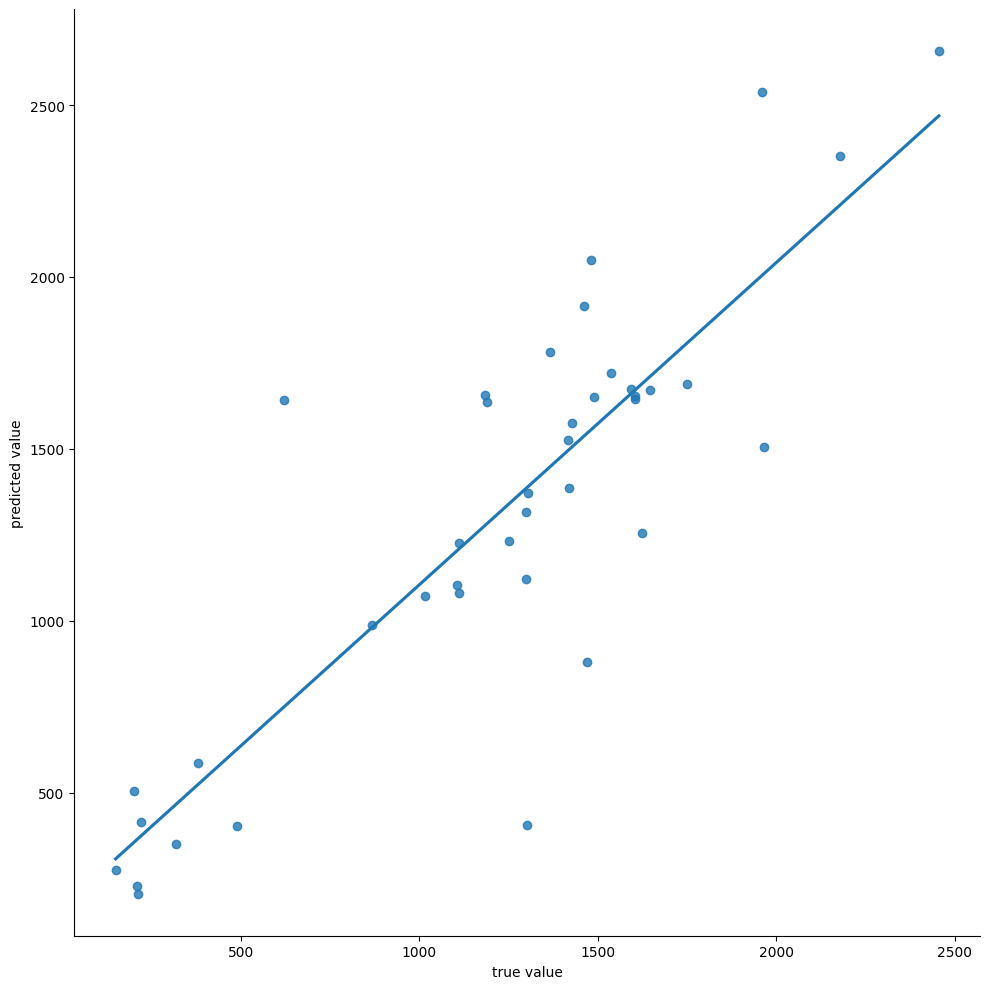

In [7]:
ax = sns.lmplot(x='true', y='predicted', data=data_as_df, height=10, ci=None)
ax.set(xlabel='true value', ylabel='predicted value')

ax

In [8]:
rgs.export('tpot_exported_pipeline_phase.py')